In [24]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [56]:
dataset = "Aapl"
method = "tfidf"

df = pd.read_pickle(f"../2_features_extraction/{dataset}_{method}_features.pkl")
df

,news_timestamp,stock_timestamp,source,tokens,label,tokens_str,aa,aal,aam,aaron,...,zink,zion,zip,zipper,zo,zodiac,zombi,zone,zoom,zulu
0,2018-11-14 12:12:00,2018-11-15,9to5mac.com,"[thing, kick, monday, news, ming, cut, shipmen...",1,thing kick monday news ming cut shipment follo...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-11-05 00:00:00,2018-11-06,morningstar.com,"[share, trade, monday, follow, maker, stock, f...",1,share trade monday follow maker stock friday s...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-11-05 12:45:00,2018-11-06,seekingalpha.com,"[portfolio, current, sit, core, dividend, grow...",1,portfolio current sit core dividend growth tic...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-11-26 00:00:00,2018-11-27,morningstar.com,"[cristina, ker, implement, sever, boost, digit...",1,cristina ker implement sever boost digit strat...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-11-23 00:00:00,2018-11-26,zacks.com,"[trade, high, three, major, stock, index, lost...",-1,trade high three major stock index lost gain d...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71936,2019-01-24 07:19:00,2019-01-25,nasdaq.com,"[photo, top, tech, stock, higher, recent, trad...",1,photo top tech stock higher recent trade share...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71937,2019-01-14 20:18:00,2019-01-15,moveefy.com,"[news, trio, babi, falcon, band, cal, spill, r...",1,news trio babi falcon band cal spill report e ...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71938,2018-12-31 00:00:00,2019-01-02,investing.com,"[major, index, other, group, amazon, rose, per...",-1,major index other group amazon rose percent bi...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71939,2019-01-28 19:00:00,2019-01-29,yahoo.com,"[might, amazon, game, evan, motley, fool, prem...",1,might amazon game evan motley fool premium new...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:

X = df.iloc[0:500 , 6:]
y = df.iloc[0:500, 4]
print(X)
print(y)
print(y.value_counts())

      aa  aal  aam  aaron   ab  aba  aback  abacus  abandon  abattoir  ...  \
0    0.0  0.0  0.0    0.0  0.0  0.0    0.0     0.0      0.0       0.0  ...   
1    0.0  0.0  0.0    0.0  0.0  0.0    0.0     0.0      0.0       0.0  ...   
2    0.0  0.0  0.0    0.0  0.0  0.0    0.0     0.0      0.0       0.0  ...   
3    0.0  0.0  0.0    0.0  0.0  0.0    0.0     0.0      0.0       0.0  ...   
4    0.0  0.0  0.0    0.0  0.0  0.0    0.0     0.0      0.0       0.0  ...   
..   ...  ...  ...    ...  ...  ...    ...     ...      ...       ...  ...   
495  0.0  0.0  0.0    0.0  0.0  0.0    0.0     0.0      0.0       0.0  ...   
496  0.0  0.0  0.0    0.0  0.0  0.0    0.0     0.0      0.0       0.0  ...   
497  0.0  0.0  0.0    0.0  0.0  0.0    0.0     0.0      0.0       0.0  ...   
498  0.0  0.0  0.0    0.0  0.0  0.0    0.0     0.0      0.0       0.0  ...   
499  0.0  0.0  0.0    0.0  0.0  0.0    0.0     0.0      0.0       0.0  ...   

     zink  zion  zip  zipper   zo  zodiac  zombi  zone  zoom  z

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier( )
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report :\n", classification_report(y_test, y_pred))

Accuracy: 0.75
Classification Report :
               precision    recall  f1-score   support

          -1       0.74      0.99      0.85        71
           1       0.83      0.17      0.29        29

    accuracy                           0.75       100
   macro avg       0.79      0.58      0.57       100
weighted avg       0.77      0.75      0.69       100



                 Model  Accuracy  Balanced Accuracy  Precision    Recall  \
0  Logistic Regression     0.700           0.666667   0.500000  0.583333   
1        Random Forest     0.775           0.648810   0.800000  0.333333   
2             AdaBoost     0.700           0.642857   0.500000  0.500000   
3                  SVC     0.700           0.523810   0.500000  0.083333   
4                  KNN     0.675           0.553571   0.428571  0.250000   
5      Voting Ensemble     0.775           0.648810   0.800000  0.333333   

   F1 Score       AUC  
0  0.538462  0.666667  
1  0.470588  0.648810  
2  0.500000  0.642857  
3  0.142857  0.523810  
4  0.315789  0.553571  
5  0.470588  0.648810  


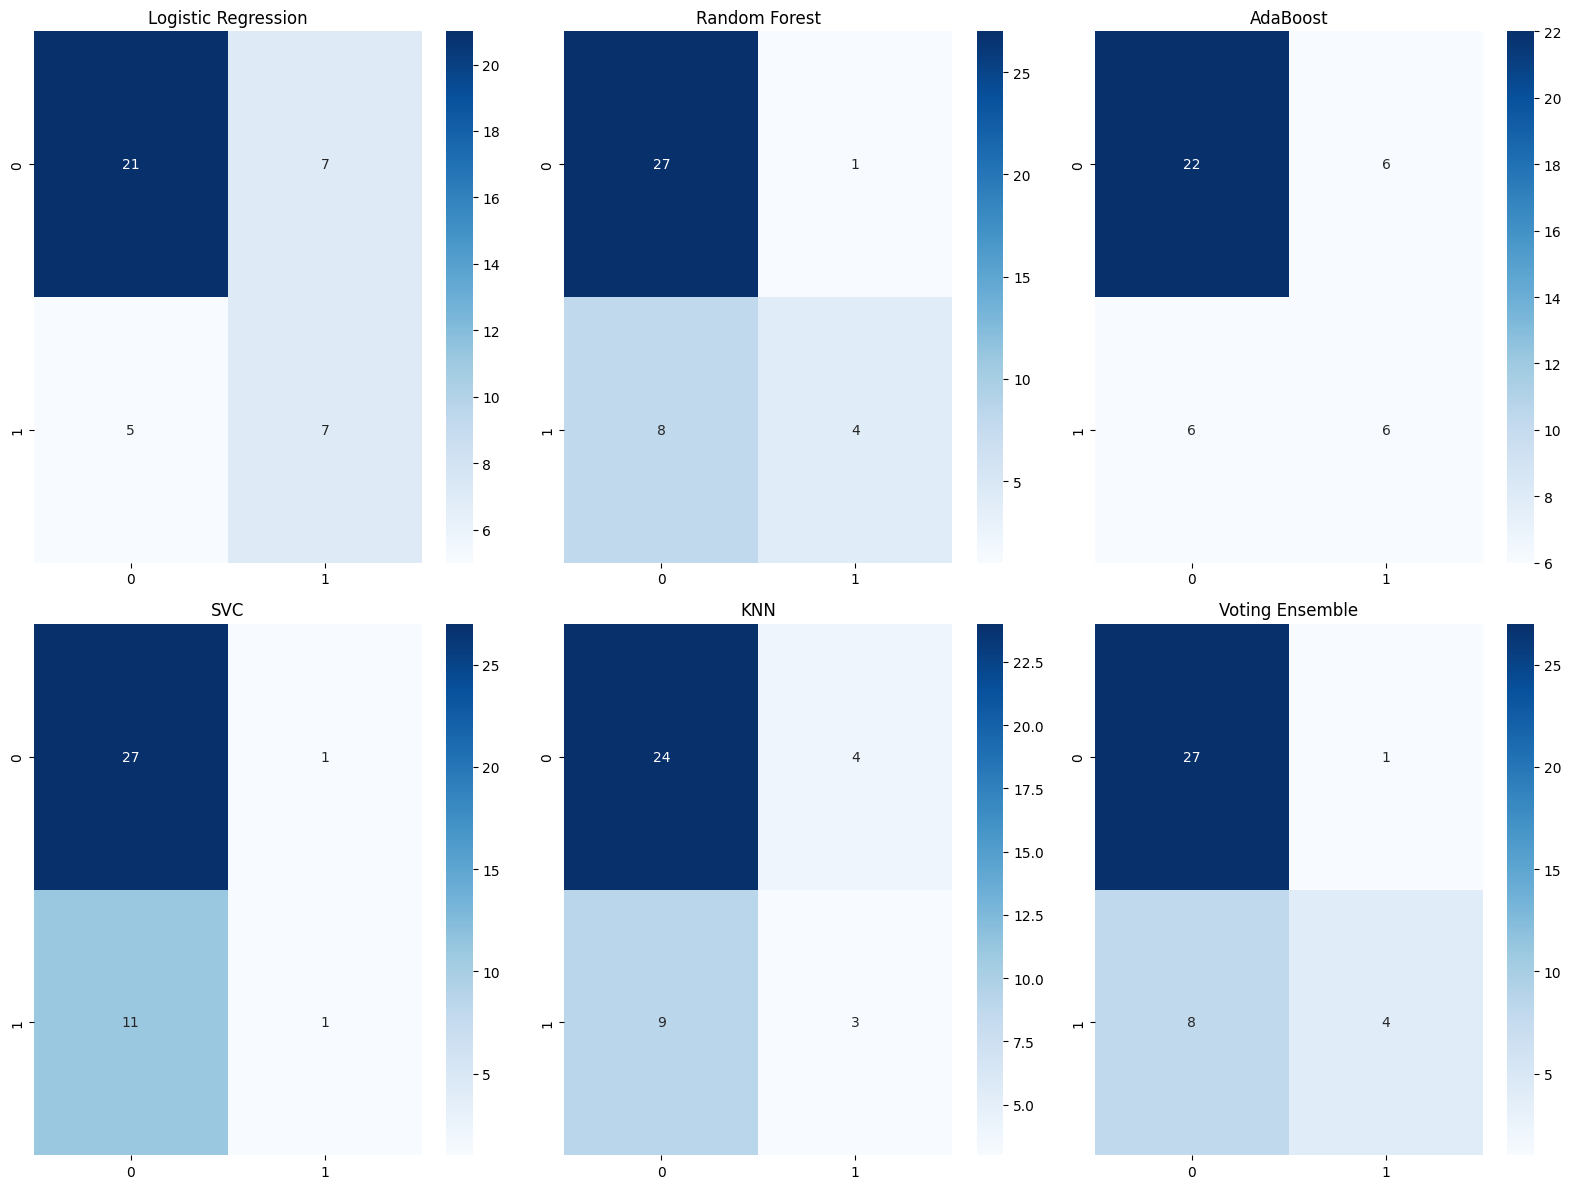

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

dataset = "Aapl"
method = "bert"

df = pd.read_pickle(f"../2_features_extraction/{dataset}_{method}_features.pkl")

X = df.iloc[0:200, 5:]
y = df.iloc[0:200, 4]

# Assuming you have your data in variables x and y
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize models
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)
svc = SVC(probability=True, random_state=42)
knn = KNeighborsClassifier()
voting_clf = VotingClassifier(estimators=[('logreg', logreg), ('rf', rf), ('adaboost', adaboost), ('svc', svc), ('knn', knn)], voting='soft')

# Train models
models = {'Logistic Regression': logreg, 'Random Forest': rf, 'AdaBoost': adaboost, 'SVC': svc, 'KNN': knn, 'Voting Ensemble': voting_clf}

results = pd.DataFrame(columns=['Model', 'Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])

confusion_matrices = {}
all_predictions = pd.DataFrame({'True Label': y_test}) 

for name, model in models.items():
    # Train the model
    model.fit(x_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test_scaled)
    
    # Save predictions to a DataFrame
    all_predictions[f'Predicted Label ({name})'] = y_pred
    
    # Save metrics to results DataFrame
    results.loc[len(results)] = [name,
                                  accuracy_score(y_test, y_pred),
                                  balanced_accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred),
                                  recall_score(y_test, y_pred),
                                  f1_score(y_test, y_pred),
                                  roc_auc_score(y_test, y_pred)]
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm
    
# Save results to CSV
results.to_csv(f'../results/{dataset}_{method}_model_results.csv', index=False)
print(results)

# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(16, 12))

for i, (name, cm) in enumerate(confusion_matrices.items()):
    row = i // 3
    col = i % 3
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[row, col])
    axes[row, col].set_title(name)

plt.tight_layout()
plt.savefig(f'../results/{dataset}_{method}_CM.png')
plt.show()

# Save all predictions to a single CSV file
all_predictions.to_csv(f'../results/{dataset}_{method}_all_predictions.csv', index=False)